<a href="https://colab.research.google.com/github/ShamsulAbedin/CA683I/blob/master/Shamsul_Abedin_CA683I_ID19215008_Netflix_Movie.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Assignment: Data Analytics and Data Mining

Research Question: Which Movie or TV show should I watch in Netflix

Student Details:

*   Student Name: Md Shamsul Abedin Malik
*   Course: CA683I Data Analytics and Data Mining
*   Student Number: 19215008

#1 Objective



Netflix has done radical revolution in Entertainment industry and it has created a big platform for the Media industry where wide variety of shows are broadcasting on a regular basis. Sometimes it becomes a big challenge to determine what should I watch next in Netflix.

In this project, I have tried to present a recommender system which will analyze the best movies and TV shows based on rating, contents, director, type, etc where I have used content-based filtering recommendation model. Analysis has been done based on approx. 148500 different words in 6235 differnt Movies and TV shows from Netflix.



#2 Data Preparation

##2.1 Data loading



**Following Package might need to install**


In [1]:
!pip install -q plotly
!pip install -q plotly_express
!pip install rake_nltk
!pip install -q cufflinks

  Created wheel for rake-nltk: filename=rake_nltk-1.0.4-py2.py3-none-any.whl size=7819 sha256=c91bf5ea02cc9a3dd6504a5fc51fde5740087f8f31ae4e096bdc2045ec45bd72
  Stored in directory: /root/.cache/pip/wheels/ef/92/fc/271b3709e71a96ffe934b27818946b795ac6b9b8ff8682483f
Successfully built rake-nltk




**Import Modules from different packages**

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.graph_objs as go
import plotly.offline as py
import plotly_express as px
import plotly.tools as tls
import plotly.figure_factory as ff
from plotly.offline import init_notebook_mode, iplot
from plotly.offline import init_notebook_mode
import os
from tqdm import tqdm, tqdm_notebook
from IPython.display import HTML
import json
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from collections import Counter
import cufflinks as cf


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


**Descriptive Analysis** *italicized text*

In [3]:
# Mount google drive in colab to link the Netflix data-set
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [4]:
from google.colab import drive
import os
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [0]:
os.chdir('/content/drive/My Drive/Colab_Notebooks/')

In [11]:
import os
for dirname, _, filenames in os.walk('/content/drive/My Drive/Colab_Notebooks/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/content/drive/My Drive/Colab_Notebooks/netflix_titles.csv
/content/drive/My Drive/Colab_Notebooks/Shamsul_Abedin_DA-ID19215008.ipynb


In [0]:
#Reading the dataset
df = pd.read_csv("/content/drive/My Drive/Colab_Notebooks/netflix_titles.csv")

In [13]:
df.tail()  # read the last five rows

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
6229,80000063,TV Show,Red vs. Blue,NaN,"Burnie Burns, Jason Saldaña, Gustavo Sorola, G...",United States,NaN,2015,NR,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...","This parody of first-person shooter games, mil..."
6230,70286564,TV Show,Maron,NaN,"Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...",United States,NaN,2016,TV-MA,4 Seasons,TV Comedies,"Marc Maron stars as Marc Maron, who interviews..."
6231,80116008,Movie,Little Baby Bum: Nursery Rhyme Friends,NaN,NaN,NaN,NaN,2016,NaN,60 min,Movies,Nursery rhymes and original music for children...
6232,70281022,TV Show,A Young Doctor's Notebook and Other Stories,NaN,"Daniel Radcliffe, Jon Hamm, Adam Godley, Chris...",United Kingdom,NaN,2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas","Set during the Russian Revolution, this comic ..."
6233,70153404,TV Show,Friends,NaN,"Jennifer Aniston, Courteney Cox, Lisa Kudrow, ...",United States,NaN,2003,TV-14,10 Seasons,"Classic & Cult TV, TV Comedies",This hit sitcom follows the merry misadventure...


In [14]:
df.head()  # read the first five rows

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


##2.2 Data Viewing

In [15]:
print("Dataset contains {} rows and {} columns".format(df.shape[0], df.shape[1]))

Dataset contains 6234 rows and 12 columns


In [20]:
# check out the dimension of the dataset
df.shape

(6234, 12)

In [21]:
# return an array of column names
df.columns.values

array(['show_id', 'type', 'title', 'director', 'cast', 'country',
       'date_added', 'release_year', 'rating', 'duration', 'listed_in',
       'description'], dtype=object)

In [22]:
# return a list of column names
df.columns.values.tolist() 

['show_id',
 'type',
 'title',
 'director',
 'cast',
 'country',
 'date_added',
 'release_year',
 'rating',
 'duration',
 'listed_in',
 'description']

In [23]:
# look at the data types for each column
df.dtypes  

show_id          int64
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [24]:
df.nunique()

show_id         6234
type               2
title           6172
director        3301
cast            5469
country          554
date_added      1524
release_year      72
rating            14
duration         201
listed_in        461
description     6226
dtype: int64

In [25]:
# knowing how many missing values in the data
df.isnull().sum()

show_id            0
type               0
title              0
director        1969
cast             570
country          476
date_added        11
release_year       0
rating            10
duration           0
listed_in          0
description        0
dtype: int64

In [0]:
df["date_added"] = pd.to_datetime(df['date_added'])
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month

df['season_count'] = df.apply(lambda x : x['duration'].split(" ")[0] if "Season" in x['duration'] else "", axis = 1)
df['duration'] = df.apply(lambda x : x['duration'].split(" ")[0] if "Season" not in x['duration'] else "", axis = 1)


In [0]:
# Necessary Functions for the Pie chart: 


def pie_plot(labels, values, colors, title):
    fig = {
      "data": [
        {
          "values": values,
          "labels": labels,
          "domain": {"x": [0, .48]},
          "name": "Job Type",
          "sort": False,
          "marker": {'colors': colors},
          "textinfo":"percent+label+value",
          "textfont": {'color': '#FFFFFF', 'size': 12},
          "hole": .6,
          "type": "pie"
        } ],
        "layout": {
            "title":title,
            "annotations": [
                {
                    "font": {
                        "size": 30,

                    },
                    "showarrow": False,
                    "text": ""

                }
            ]
        }
    }
    return fig


In [28]:
# Content Type on Netflix

value_counts = df['type'].value_counts()
labels = value_counts.index.tolist()
py.iplot(pie_plot(labels, value_counts,['#141ad9', '#de7882'], "Type Distribution"))

In [29]:
#Content added in Netflix for TV Shows and Movies over the years


column = "year_added"


DataType1 = df[df["type"] == "TV Show"]
DataType2 = df[df["type"] == "Movie"]

value_count_1 = DataType1[column].value_counts().reset_index()
value_count_1 = value_count_1.rename(columns = {column : "count", "index" : column})
value_count_1['percent'] = value_count_1['count'].apply(lambda x : 100*x/sum(value_count_1['count']))
value_count_1 = value_count_1.sort_values(column)

value_count_2 = DataType2[column].value_counts().reset_index()
value_count_2 = value_count_2.rename(columns = {column : "count", "index" : column})
value_count_2['percent'] = value_count_2['count'].apply(lambda x : 100*x/sum(value_count_2['count']))
value_count_2 = value_count_2.sort_values(column)

trace1 = go.Scatter(x=value_count_1[column], y=value_count_1["count"], name="TV Shows in Netflix", marker=dict(color="#141ad9"))
trace2 = go.Scatter(x=value_count_2[column], y=value_count_2["count"], name="Movies in Netflix", marker=dict(color="#de7882"))
data = [trace1, trace2]
layout = go.Layout(title="The growth of Netflix's library over the years for TV Shows and Movies", legend=dict(x=0.1, y=1.1, orientation="h"))
fig = go.Figure(data, layout=layout)
fig.show()

In [31]:
#The ratings of the content for TV shows and Movies

column = "rating"

DataType1 = df[df["type"] == "TV Show"]
DataType2 = df[df["type"] == "Movie"]

value_count_1 = DataType1[column].value_counts().reset_index()
value_count_1 = value_count_1.rename(columns = {column : "count", "index" : column})
value_count_1['percent'] = value_count_1['count'].apply(lambda x : 100*x/sum(value_count_1['count']))
value_count_1 = value_count_1.sort_values(column)

value_count_2 = DataType2[column].value_counts().reset_index()
value_count_2 = value_count_2.rename(columns = {column : "count", "index" : column})
value_count_2['percent'] = value_count_2['count'].apply(lambda x : 100*x/sum(value_count_2['count']))
value_count_2 = value_count_2.sort_values(column)

trace1 = go.Bar(x=value_count_1[column], y=value_count_1["count"], name="TV Shows in Netflix", marker=dict(color="#141ad9"))
trace2 = go.Bar(x=value_count_2[column], y=value_count_2["count"], name="Movies in Netflix", marker=dict(color="#de7882"))
data = [trace1, trace2]
layout = go.Layout(title="The ratings of the content for TV shows and Movies", legend=dict(x=0.1, y=1.1, orientation="h"))
fig = go.Figure(data, layout=layout)
fig.show()

In [32]:
#Some of the oldest movies on Netflix


oldest_movie = df.sort_values("release_year", ascending = True)
oldest_movie = oldest_movie[oldest_movie['duration'] != ""]
oldest_movie[['title', "release_year"]][:15]


,title,release_year
2011,Prelude to War,1942
2013,The Battle of Midway,1942
2022,Undercover: How to Operate Behind Enemy Lines,1943
2023,Why We Fight: The Battle of Russia,1943
2026,WWII: Report from the Aleutians,1943
2017,The Memphis Belle: A Story of a\nFlying Fortress,1944
2019,The Negro Soldier,1944
2021,Tunisian Victory,1944
2012,San Pietro,1945
2009,Nazi Concentration Camps,1945


In [33]:
#Some of the oldest TV Shows on Netflix


Oldest_TvShow = df.sort_values("release_year", ascending = True)
Oldest_TvShow = Oldest_TvShow[Oldest_TvShow['season_count'] != ""]
Oldest_TvShow[['title', "release_year"]][:15]


,title,release_year
4292,Pioneers: First Women Filmmakers*,1925
4079,Pioneers of African-American Cinema,1946
5981,The Twilight Zone (Original Series),1963
5980,The Andy Griffith Show,1967
5704,Star Trek,1968
614,Monty Python's Fliegender Zirkus,1972
5669,Monty Python's Flying Circus,1974
5830,Dad's Army,1977
4273,El Chavo,1979
4369,Ninja Hattori,1981


In [34]:
#Country with the most number of titles for TV Shows and Movies

top_work_unitdf = df['country'].value_counts().rename_axis('Country').reset_index(name='counts')[:10]

fig = px.bar(top_work_unitdf, y="Country", x='counts', orientation='h', title = "Country with the most number of titles for TV Shows and Movies",color=  "counts", color_continuous_scale=px.colors.qualitative.Prism).update_yaxes(categoryorder="total ascending")

fig.show()



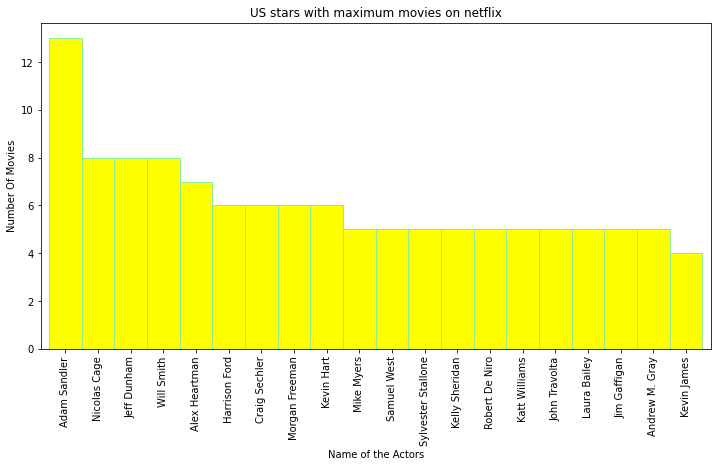

In [35]:
import cufflinks as cf
import plotly.offline
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)
indcast=[]
ind=df.query('country=="United States"')
for i in ind['cast']:
    indcast.append(i)
newls=[]
for i in indcast:
    newls.append(str(i).split(',')[0])
inddf=pd.DataFrame(newls,columns=['name'])
ind_df=inddf.drop(inddf.query('name=="nan"').index)
ind_df['name'].value_counts().head(20).plot(kind="bar",width=1,color='Yellow',edgecolor='lightgreen',figsize=(12,6))
plt.xlabel("Name of the Actors")
plt.ylabel("Number Of Movies")
plt.title("US stars with maximum movies on netflix")
plt.show()

In [0]:

df_mov=df.query("type=='Movie'")
df_mov['min']=df_mov['duration'].str.split(' ',expand=True)[0]
df_mov['min']=df_mov['min'].astype(int)
df_mov['hr']=df_mov['min']/60

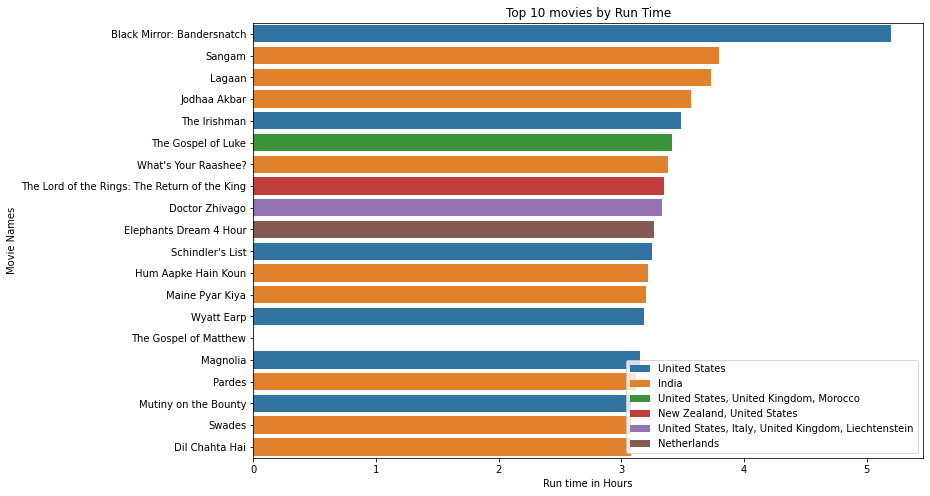

In [37]:
##Top Movies By Run Time

top20run=df_mov.sort_values(by='hr',ascending=False).head(20)
plt.figure(figsize=(12,8))
sns.barplot(data=top20run,y='title',x='hr',hue='country',dodge=False)
plt.legend(loc='lower right')
plt.title('Top 10 movies by Run Time')
plt.xlabel('Run time in Hours')
plt.ylabel('Movie Names')
plt.show()

##2.4 Data Cleaning

In [38]:
#Find Duplicate entry
#duplicate_entry=df.duplicated(['title','country','type','release_year'])

duplicate_entry=df.duplicated(['title'])
df[duplicate_entry]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,season_count
378,80133200,TV Show,Maniac,NaN,"Espen Petrus Andersen Lervaag, Håkon Bast Moss...",Norway,2017-09-01,2015,TV-MA,,"International TV Shows, TV Comedies, TV Dramas",A nondescript man in a mental hospital has an ...,2017.0,9.0,1
843,81167047,TV Show,Tunnel,NaN,"Choi Jin-hyuk, Yoon Hyun-min, Lee Yoo-young, C...",South Korea,2019-10-01,2017,TV-MA,,"Crime TV Shows, International TV Shows, Korean...","While chasing a serial murderer, a detective e...",2019.0,10.0,1
1066,81033200,Movie,Love,"Kabir Bhatia, Titien Wattimena","Acha Septriasa, Darius Sinathrya, Fauzi Baadil...",Indonesia,2018-11-30,2008,TV-PG,120,"Dramas, International Movies, Romantic Movies","In Jakarta, five couples of varying ages and b...",2018.0,11.0,
1361,81189912,Movie,Drive,Tarun Mansukhani,"Jacqueline Fernandez, Sushant Singh Rajput, Bo...",India,2019-11-01,2019,TV-14,119,"Action & Adventure, International Movies",A notorious thief allies with a street racer f...,2019.0,11.0,
1597,80209866,Movie,Manhunt,John Woo,"Zhang Hanyu, Masaharu Fukuyama, Qi Wei, Ji-won...","China, Hong Kong",2018-05-04,2017,TV-MA,109,"Action & Adventure, International Movies",A Chinese pharmaceutical lawyer framed for a v...,2018.0,5.0,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5930,80233218,TV Show,Kakegurui,NaN,"Minami Hamabe, Mahiro Takasugi, Aoi Morikawa",Japan,2019-07-04,2019,TV-14,,"International TV Shows, TV Dramas, TV Thrillers",Yumeko Jabami enrolls at Hyakkaou Private Acad...,2019.0,7.0,2
5978,80103470,TV Show,Hostages,NaN,"Jonah Lotan, Ayelet Zurer, Tomer Kapon, Micha ...",Israel,2017-07-01,2016,TV-MA,,"Crime TV Shows, International TV Shows, TV Dramas",The night before a surgeon is set to operate o...,2017.0,7.0,2
6026,80041601,TV Show,Lovesick,NaN,"Johnny Flynn, Antonia Thomas, Daniel Ings, Han...",United Kingdom,2018-01-01,2018,TV-MA,,"British TV Shows, International TV Shows, Roma...","In his quest for true love, Dylan found chlamy...",2018.0,1.0,3
6159,70140438,TV Show,Skins,NaN,"Kaya Scodelario, Hannah Murray, Jack O'Connell...",United Kingdom,2017-08-02,2013,TV-MA,,"British TV Shows, International TV Shows, TV D...",This incisive series centers on the tense live...,2017.0,8.0,7


In [0]:
#Replace NaN with an empty string
df['description'] = df['description'].fillna('')

# removing duplicates from the data frame
unique_names = pd.Series(df.index, index=df['title']).drop_duplicates()

#3 Methodology




There are wide variety and significant number of Movies and TV shows available abd people usually tend to watch shows based on the current content as well as best recommended or rated by other viewers.

There are Three types of Recommender systems


* **Demographic Filtering** 


> Demographic filtering provides generalized recommendation to every targeted user based on the popularity of the items. This type of filter recommender system considers that the items which are highly viewed and more popular will be chosen by the average audience.


* **Collaborative Filtering**

> This Collaborative filter can be used to recommend the Movie or TV shows which has not been watched Based on the similarity with the items of the target users and user’s rating. Similarity can be calculated by Cosine similarity or Pearson correlation.

* **Content Based Filtering**


> Content base filter suggests similar items based on user’s interest on an item. This filter does not depend on another users’ rating. To provide the recommendation, this type of filter uses the metadata of the item such as descriptions, director, actors etc. for the TV shows and movies.


>Here we will prepare the Plot based on the similarity of the Descriptions and Movie name will be recommended according to the similarity score. 

> The workflow of the recommender system is to Convert the words into their respective Term Frequency - Inverse Document Frequency Score.




#4 Evaluation



## 4.1	Recommend with Content Based Filtering


> Building content based recommender system using cosine similarity algorithm.


> Here I have used   TF-IDF matrix to draw the final similarity score by reducing the importance of the words which are occurring very frequently in the plot.
TF-IDF matrix can be produced using TfIdfVectorizer class in scikit-learn.


In [0]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer

In [41]:
#Define a TF-IDF Vectorizer Object. Remove all english stop words such as 'the', 'a'
tfidf_vect = TfidfVectorizer(stop_words='english')


#Construct the required TF-IDF matrix by fitting and transforming the data
tfidf_matrix = tfidf_vect.fit_transform(df['description'])

#Output the shape of tfidf_matrix
tfidf_matrix.shape



(6234, 16151)

**Cosine Similar**

> we will use Cosine Similarity to calculete the nemeric similarity between differnt matices





> We have to apply the similarity score based on more than 148000 different words and 5234 Movies and TV shows in the dataset.
Out of different types of method like Pearson, Cosine Similarity scores, here I have applied cosine similarity scopes to find the similarity between different movies as this is relatively easy and quicker to calculate.
Mathematical terms for the cosine similarity as follows: 

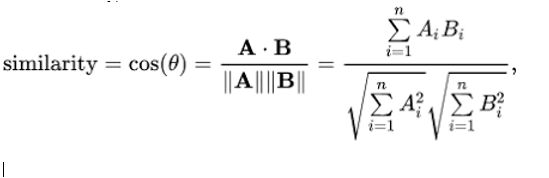





In [0]:
# Compute the cosine similarity matrix
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

In [0]:
# Following functions are used to generate the output of similar movies based on the movie title as input

def get_recommendations(title, number=10, cosine_sim=cosine_sim):
    # Find movie index with matching title
    movie_list = unique_names[title]

    # generate pairwsie similarity scores 
    score = list(enumerate(cosine_sim[movie_list]))

    # Sort the movies depneding on the similarity scores
    score = sorted(score, key=lambda x: x[1], reverse=True)

    # The scores of the n most movies based on similarity
    score = score[1:number]

    # movie indices
    movie_indices = [i[0] for i in score]

    # Finding the top most similar movies
    return df['title'].iloc[movie_indices]


In [0]:
new_df = df[['title','director','cast','listed_in','description']]

In [45]:
new_df.head()

,title,director,cast,listed_in,description
0,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,Jandino: Whatever it Takes,NaN,Jandino Asporaat,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",Kids' TV,"With the help of three human allies, the Autob..."
3,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",Kids' TV,When a prison ship crash unleashes hundreds of...
4,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",Comedies,When nerdy high schooler Dani finally attracts...


In [0]:
from rake_nltk import Rake

In [0]:
new_df['director']=new_df['director'].fillna(' ')
new_df['director']=new_df['director'].astype('str')
new_df['cast']=new_df['cast'].fillna(' ')
new_df['cast']=new_df['cast'].astype('str')

In [0]:
new_df['Content_Description']= ''
for index,row in new_df.iterrows():
    plot = row['description']
    r = Rake()
    r.extract_keywords_from_text(plot)
    keyword_score = r.get_word_degrees()
    g = ''.join(row['listed_in'].split(',')).lower()
    d = ''.join(row['director'].replace(' ','').split(',')).lower()
    a = ' '.join(row['cast'].replace(' ','').split(',')).lower()
    k = ' '.join(list(keyword_score.keys()))
    row['Content_Description'] = g + ' ' + ' ' + d + ' ' + a + ' ' + k

mydf = new_df[['title','Content_Description']]

In [49]:
mydf.head()

,title,Content_Description
0,Norm of the North: King Sized Adventure,children & family movies comedies richardfinn...
1,Jandino: Whatever it Takes,stand-up comedy jandinoasporaat rousing rend...
2,Transformers Prime,kids' tv petercullen sumaleemontano frankwel...
3,Transformers: Robots in Disguise,kids' tv willfriedle darrencriss constancezi...
4,#realityhigh,comedies fernandolebrija nestacooper katewals...


In [50]:
get_recommendations('Good People', 5)

4502       Luck by Chance
4042       Velvet Buzzsaw
3317    Where's the Money
4451           Soundtrack
Name: title, dtype: object

In [51]:
get_recommendations('Norm of the North: King Sized Adventure')

1780    Norm of the North: Keys to the Kingdom
2222                                    Ottaal
70                               We Bare Bears
6205               Pororo - The Little Penguin
4665              Man vs Wild with Sunny Leone
3785                                The Lovers
423                           Garuda Di Dadaku
5239                    Ingress: The Animation
4692                                Sardaar ji
Name: title, dtype: object

#4 Conclusion

Sometimes users or audiences rate the item as good, execellent or bad without proper indication which becomes very tricky to determine whether users are really proving proper evaluation or not. 

Based on this thought I have selected Content based filtering model which captures the items based on particular interest of the users.
As the recommendations are very specific to the user so this model doesn't require any evaluation of the users.

**Reference**

1. https://www.kaggle.com/shivamb/netflix-shows
2.https://www.kaggle.com/ibtesama/getting-started-with-a-movie-recommendation-system
---

